#Yash Sarfare BE CMPN A 21102A0070

#Github Link: [Click here](https://github.com/Yash4518/MLExperiments-70)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Classification

In [4]:

data = pd.read_csv('/content/wdbc.data', header=None)
data.columns = ["ID", "Diagnosis", "radius1", "texture1", "parameter1", "area1", "smoothness1", "compactness1", "concavity1", "concave_points1", "symmetry1", "fractual_dimension1",
                "radius2", "texture2", "parameter2", "area2", "smoothness2", "compactness2", "concavity2", "concave_points2", "symmetry2", "fractual_dimension2",
                "radius3", "texture3", "parameter3", "area3", "smoothness3", "compactness3", "concavity3", "concave_points3", "symmetry3", "fractual_dimension3"]
data.head()

,ID,Diagnosis,radius1,texture1,parameter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,parameter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractual_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   569 non-null    int64  
 1   Diagnosis            569 non-null    object 
 2   radius1              569 non-null    float64
 3   texture1             569 non-null    float64
 4   parameter1           569 non-null    float64
 5   area1                569 non-null    float64
 6   smoothness1          569 non-null    float64
 7   compactness1         569 non-null    float64
 8   concavity1           569 non-null    float64
 9   concave_points1      569 non-null    float64
 10  symmetry1            569 non-null    float64
 11  fractual_dimension1  569 non-null    float64
 12  radius2              569 non-null    float64
 13  texture2             569 non-null    float64
 14  parameter2           569 non-null    float64
 15  area2                569 non-null    flo

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

X = data.drop(columns='Diagnosis')
X = X.drop(columns='ID')
y = data['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='M')
recall = recall_score(y_test, y_pred, pos_label='M')
f1 = f1_score(y_test, y_pred, pos_label='M')


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9649122807017544
Precision: 0.975609756097561
Recall: 0.9302325581395349
F1 Score: 0.9523809523809524
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

[[70  1]
 [ 3 40]]


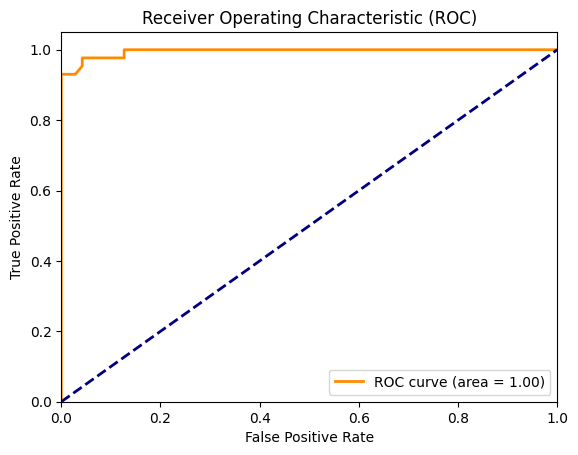

In [8]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

#Regression

In [10]:
data2 = pd.read_csv('/content/housing.csv')
data2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
data2.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [13]:
data2.dropna(inplace=True)
data2.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [14]:
data2.reset_index(inplace=True, drop=True)
data2['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9034
INLAND,6496
NEAR OCEAN,2628
NEAR BAY,2270
ISLAND,5


In [15]:
data2['ocean_proximity']=le.fit_transform(data2['ocean_proximity'])

In [16]:
data2["rooms_per_household"] = data2["total_rooms"]/data2["households"]
data2["bedrooms_per_room"] = data2["total_bedrooms"]/data2["total_rooms"]
data2["population_per_household"]=data2["population"]/data2["households"]

data2.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,-0.289530,-0.027307,0.092657,0.002304
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,0.200801,0.106423,-0.113815,0.002522
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,0.112330,-0.153031,0.136089,0.013258
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,-0.015363,0.133482,-0.187900,-0.024596
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,-0.014768,0.001538,0.084238,-0.028355
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,-0.069630,-0.071898,0.035319,0.070062
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,-0.018251,-0.080165,0.065087,-0.027336
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,-0.014679,0.325307,-0.615661,0.018894
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.080488,0.151344,-0.255880,-0.023639
ocean_proximity,-0.289530,0.200801,0.112330,-0.015363,-0.014768,-0.069630,-0.018251,-0.014679,0.080488,1.000000,-0.002641,0.002107,-0.009152


In [17]:
X2 = data2.drop(columns='median_house_value', axis=1).values
y2 = data2['median_house_value'].values

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=42)

In [18]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor()

rf_regressor.fit(X2_train, y2_train)

y2_pred = rf_regressor.predict(X2_test)

In [19]:
mse = mean_squared_error(y2_test, y2_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y2_test, y2_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 2621200915.1299033
R-squared: 0.806250668169226


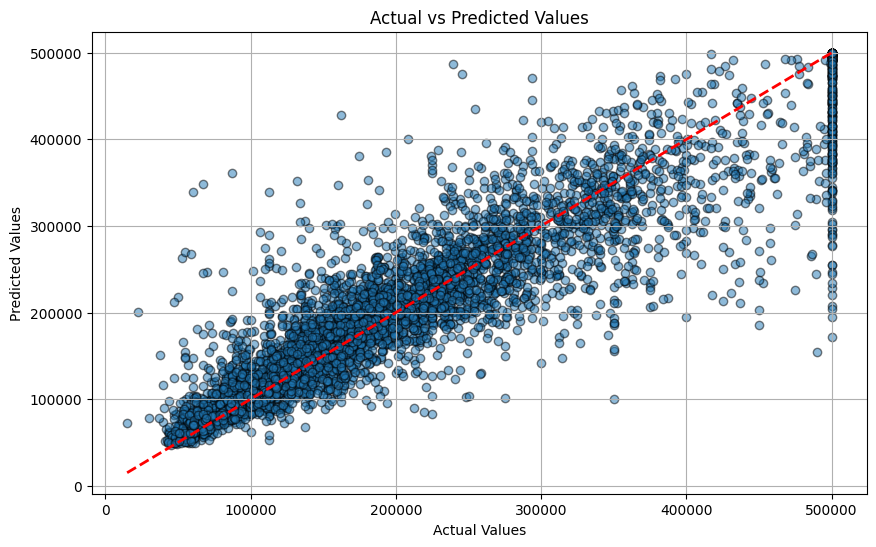

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y2_test, y2_pred, alpha=0.5, edgecolor='k')
plt.plot([y2_test.min(), y2_test.max()], [y2_test.min(), y2_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()
